# 8/12/2022

# Computer vision
# Filterlash va Threshold funksiyasi

# Muallif: Farrux Sotivoldiyev

# Funksiyalar
* filter2D
* threshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import cv2

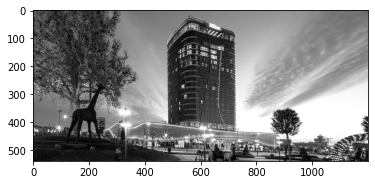

In [2]:
rasm = cv2.imread("RASMLAR/Tashkent.jpg",0)
plt.imshow(rasm,cmap="gray")
plt.show()

# Filterlash

* **`Filterlashdan oldin yani kernelga solishdan oldin matrixni atrofini 0 lar bilan to'ldiradi songra kernelga soladi va shunda rasmimizni olchami o'zgarishsiz qoladi`**
*
* **`Kernelning sonlarini yeg'indisi manfiy bo'lsa qora bo'lib qoladi,0 bo'lsa filterlaydi musbat bo'lsa blurlaydi.Blurlashni pastda batafsil o'qishingiz mumkin
`**

* Low past filter - da rasmimiz blurlanadi.Sababi yeg'indisi musbat bo'lgani uchun.
*
* High past filter - da rasmimiz oq qora bo'lib qoladi.Sababi yeg'indisi 0 bo'lgani uchun.Qandaydir o'qlar bo'yicha filterlaymiz

In [8]:
kernel = np.array([[0,-1,-1],  # maqsadsiz kernel
                   [1,-1,1],
                   [0,-1,1]])

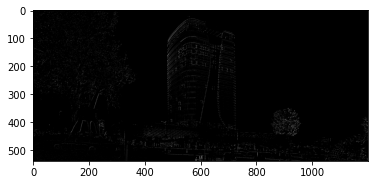

In [10]:
filter_rasm = cv2.filter2D(rasm,-1,kernel)
plt.imshow(filter_rasm,cmap="gray")
plt.show()

**`Filterlashda - O'zimiz kernel yaratmoqchi bo'lsak kernel ichidagi sonlar yeg'indisi 0 bo'lishi kerak `**

In [12]:
kernel = np.array([[0,-1,-1],   # Maqsadli kernel
                   [1,4,-1],  
                   [0,-1,-1]])

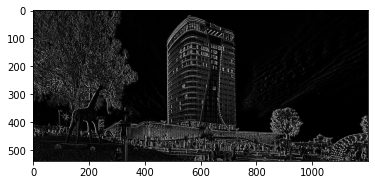

In [13]:
filter_rasm = cv2.filter2D(rasm,-1,kernel)
plt.imshow(filter_rasm,cmap="gray")

# Identity kernel

In [19]:
identity = np.array([[0,0,0],  # yegindisi 1 (rasmga tasir qilmaydi)
                   [0,1,0],
                   [0,0,0]])

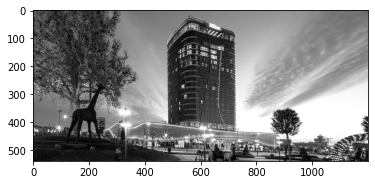

In [20]:
filter_rasm = cv2.filter2D(rasm,-1,identity)
plt.imshow(filter_rasm,cmap="gray")

 # Edge detection - edge larini topib beradi

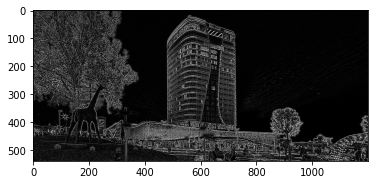

In [21]:
edge = np.array([[-1,-1,-1],  # yeg'indisi 0 (rasmning edge larini topib beradi)
                   [-1,8,-1],
                   [-1,-1,-1]])
filter_rasm = cv2.filter2D(rasm,-1,edge)
plt.imshow(filter_rasm,cmap="gray")

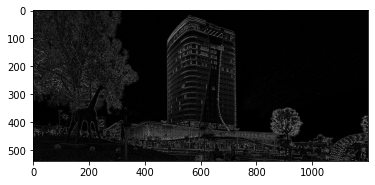

In [22]:
edge = np.array([[0,-1,0],  # yeg'indisi 0 (rasmning edge larini topib beradi eng kerakli qismini)
                   [-1,4,-1],
                   [0,-1,0]])
filter_rasm = cv2.filter2D(rasm,-1,edge)
plt.imshow(filter_rasm,cmap="gray")

# Sharpen kernel

In [23]:
sharpen = np.array([[0,-1,0],  
                [-1,5,-1],
                [0,-1,0]])

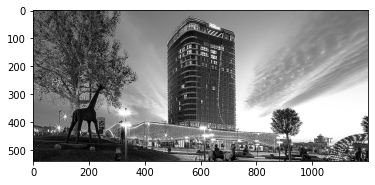

In [24]:
filter_rasm = cv2.filter2D(rasm,-1,sharpen)
plt.imshow(filter_rasm,cmap="gray")

# Sobel  x kernel - x o'qiga  tegmagan holda filterlaydi

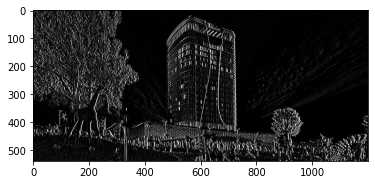

In [8]:
sobel_x = np.array([[-1,0,1],  
                    [-2,0,2],
                    [-1,0,1]])
filter_rasm = cv2.filter2D(rasm,-1,sobel_x)
plt.imshow(filter_rasm,cmap="gray")

# Sobel  y kernel - y o'qiga  tegmagan holda filterlaydi

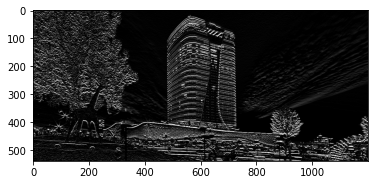

In [9]:
sobel_y = np.array([[-1,-2,-1],  
                    [0,0,0],
                    [1,2,1]])
filter_rasm = cv2.filter2D(rasm,-1,sobel_y)
plt.imshow(filter_rasm,cmap="gray")

# Guassian blur va blur boxlar past o'tish fillteri hisoblanadi.
* Bularda sonlarning yeg'indisini o'rtadagi sonning kvadratiga bo'lganda 1 ga teng bo'lishi kerak

In [1]:
# 1 2 1
# 2 4 2 * 1/16 = 1 # Guassian 3x3
# 1 2 1

# 1 2 4  2 1
# 2 4 8  4 2
# 4 8 16 8 4 * 1/256 # Guassian 5x5
# 2 4 8  4 2
# 1 2 4  2 1

# 1 1 1
# 1 1 1 * 1/9 = 1 # Box blur
# 1 1 1

# Box blur

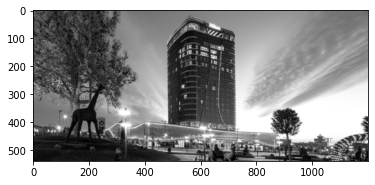

In [33]:
box = np.array([[1,1,1],  
                [1,1,1],
                [1,1,1]]) * 1/9

filter_rasm = cv2.filter2D(rasm,-1,box)
plt.imshow(filter_rasm,cmap="gray")

# Guassian blur

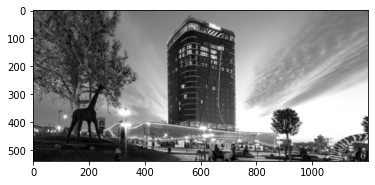

In [42]:
blur = cv2.GaussianBlur(rasm,(5,5),0)  #Kernelni qancha kattartirsak shuncha blurlanish darajasi oshadi
plt.imshow(blur,cmap="gray")

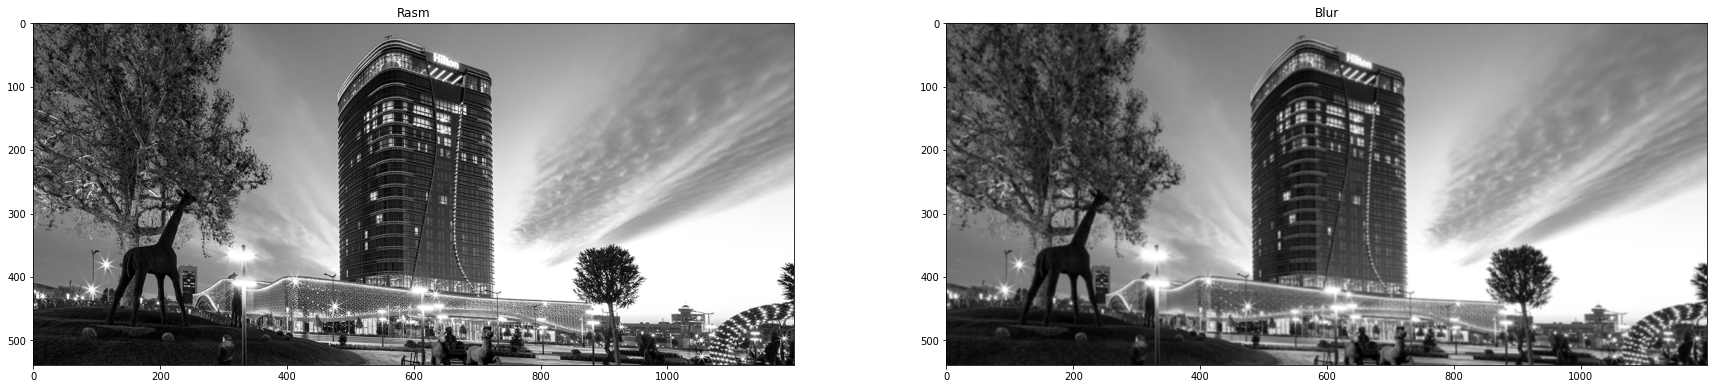

In [74]:
plt.figure(figsize=(30,15)) # Ikkalasining farqi bittasi tinniq ikkinchisi blurlangan

plt.subplot(121)
plt.title("Rasm")
plt.imshow(rasm,cmap="gray")

plt.subplot(122)
plt.title("Blur")
plt.imshow(blur,cmap="gray")

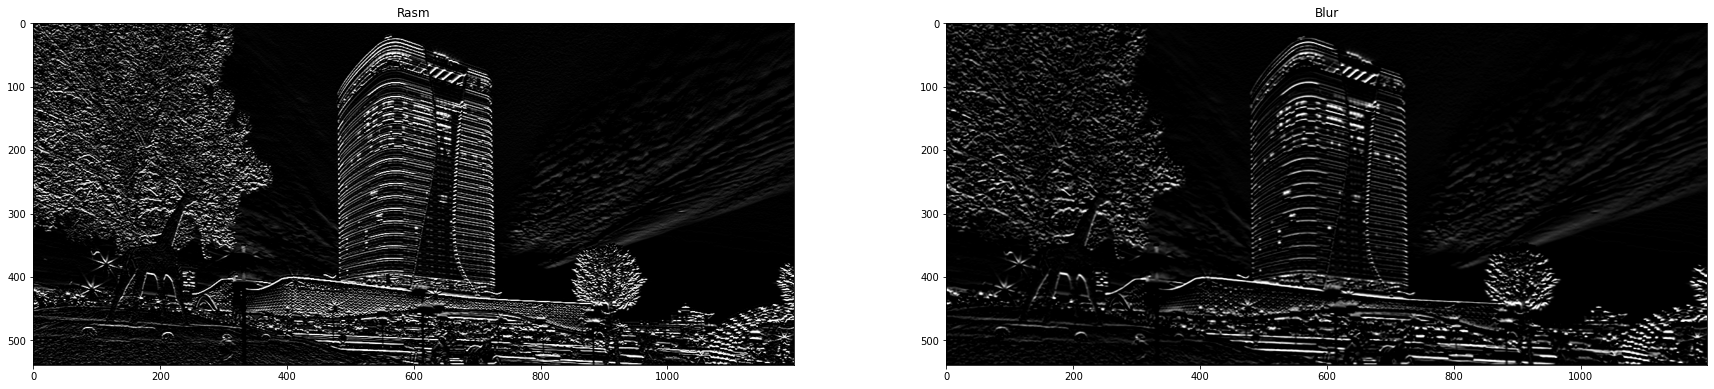

In [71]:
sobel_y = np.array([[-1,-2,-1],  
                    [0,0,0],
                    [1,2,1]])

plt.figure(figsize=(30,15)) 

plt.subplot(121)
filter_rasm = cv2.filter2D(rasm,-1,sobel_y)
plt.title("Rasm")
plt.imshow(filter_rasm,cmap="gray")

plt.subplot(122)
filter_blur = cv2.filter2D(blur,-1,sobel_y)
plt.title("Blur")
plt.imshow(filter_blur,cmap="gray")

# threshold

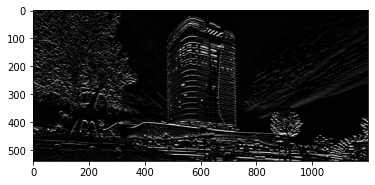

In [70]:
plt.imshow(filter_blur,cmap="gray")

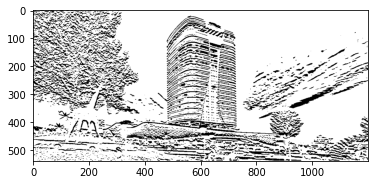

In [69]:
ret,rasm_thresh = cv2.threshold(filter_blur,20,255,cv2.THRESH_BINARY_INV)
plt.imshow(rasm_thresh,cmap="gray")